# Data Cleaning with Pandas
kita akan fokus ke cara menggunakan pandas untuk mempersiapkan data yang bersih

- missing values
- invalid values
- tipe data per kolom
- judul kolom
- tambahan kolom
- filter, query

data yang sudah bersih bisa kita groupby dan aggregate, kita buat visualisasinya, kita carikan insight (informasi).



In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime

package numpy untuk hitung aritmatik, saat perlu

package pandas untuk import data tabular, manipulasi data, termasuk data cleaning

package matplotlib untuk membuat grafik yang lebih bisa kita custom

In [ ]:
# Case Study: Data Cleaning
# import data
df_prop = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv")
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
df_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [ ]:
# untuk kolom pertama, ada pattern dimana nomor PID adalah nomor (index+1)*1000 + 100jt
df_prop[df_prop['PID'].isnull()]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
4,NaN,203.0,BERKELEY,Y,3,2,1600


In [ ]:
# mendapatkan khusus baris data yang kolom PID punya value null
df_prop[df_prop['PID'].isnull()]["PID"]

4   NaN
Name: PID, dtype: float64

In [ ]:
# mendapatkan index yang kolom PID punya value null
PID_indexes = list(df_prop[df_prop['PID'].isnull()]["PID"].index)
PID_indexes

[4]

In [ ]:
for i in PID_indexes:
  df_prop.loc[i, "PID"] = (i+1) * 1000 + 100000000

In [ ]:
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


untuk kolom berikut, ST_NUM, tidak ada pattern tertentu

karena ini adalah angka jalanan, baiknya kita bukan pakai rata-rata. mungkin kita bisa gunakan satu angka jalanan spesial untuk yang tidak terisi. misalnya 100

In [ ]:
df_prop['ST_NUM'] = df_prop['ST_NUM'].fillna(100)
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,100.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,100.0,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


kolom berikut ST_NAME penuh tidak ada missing values, aman

kolom berikut OWN_OCCUPIED ada 2 hal aneh: ada 1 missing value, dan ada angka 12. Padahal dari konteks datanya, harusnya isinya cuma Y atau N, untuk sedang ditinggali atau tidak.

In [ ]:
# kita cari semua data yang missing value
# mungkin kita mau tambahkan "U" untuk unknown?

df_prop['OWN_OCCUPIED'] = df_prop['OWN_OCCUPIED'].fillna("U")
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,100.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,100.0,WASHINGTON,U,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
# sekarang harusnya semua value adalah Y atau N atau U
k1 = df_prop['OWN_OCCUPIED'] == "Y"
k2 = df_prop['OWN_OCCUPIED'] == "N"
k3 = df_prop['OWN_OCCUPIED'] == "U"

# data kita boleh salah satu dari Y N atau U
kon = (k1 | k2 | k3)

kon

0     True
1     True
2     True
3    False
4     True
5     True
6     True
7     True
8     True
Name: OWN_OCCUPIED, dtype: bool

In [ ]:
# flip boolean values nya
~kon

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [ ]:
# baris data yang kolom OWN_OCCUPIED bukan value Y N atau U
df_prop[~kon]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
3,100004000.0,201.0,BERKELEY,12,1,NaN,700


In [ ]:
df_prop.loc[~kon, "OWN_OCCUPIED"] = "U"

In [ ]:
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,100.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,U,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,100.0,WASHINGTON,U,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


kolom berikutnya NUM_BEDROOMS ada value NaN yang missing value, ada "--" dan ada "na"

padahal dari konteks datanya, "--" dan "na" juga sepertinya memiliki arti NaN, data tidak diketahui atau kosong.

di situasi seperti ini, lebih mudah kalau kita gunakan built-in funciton Python untuk mengubah "--" dan "na" dan bisa variasi lainnya menjadi missing values saat kita import datanya.

atau kita bisa pakai replace juga untuk ubah

In [ ]:
# ubah dari import
pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv",
            na_values=["-", "--", "na", "NA"])

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [ ]:
df_prop['NUM_BEDROOMS'].replace({"na":np.nan, "--":np.nan})

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: object

In [ ]:
df_prop['NUM_BEDROOMS'] = df_prop['NUM_BEDROOMS'].replace({"na":np.nan, "--":np.nan})
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,100.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,U,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,100.0,WASHINGTON,U,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800


In [ ]:
# missing values nya untuk NUM_BEDROOMS mungkin kita bisa pakai median jumlah bedroom di dataset kita
# mean, median, selected value

median_bedroom = df_prop['NUM_BEDROOMS'].median()
median_bedroom

3.0

In [ ]:
median_bedroom = int(median_bedroom)

In [ ]:
df_prop['NUM_BEDROOMS'] = df_prop['NUM_BEDROOMS'].fillna(median_bedroom)
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,100.0,LEXINGTON,N,3,1,850
3,100004000.0,201.0,BERKELEY,U,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,3,1,800
6,100007000.0,100.0,WASHINGTON,U,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,3,1,NaN
8,100009000.0,215.0,TREMONT,Y,3,2,1800


In [ ]:
# cari tipe data non numerik di kolom NUM_BATH
for (index, row) in df_prop["NUM_BATH"].iteritems():
  # kita ubah data jadi tipe float
  # kalau error, berarti datanya invalid
  try:
    df_prop.loc[index, "NUM_BATH"] = float(row)
  except:
    df_prop.loc[index, "NUM_BATH"] = np.nan

df_prop["NUM_BATH"]

<ipython-input-22-568147750a33>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (index, row) in df_prop["NUM_BATH"].iteritems():


0    1.0
1    1.5
2    1.0
3    NaN
4    2.0
5    1.0
6    NaN
7    1.0
8    2.0
Name: NUM_BATH, dtype: object

In [ ]:
# fill na
# kali ini misalkan kita gunakan mean untuk isi
mean_bath = int(df_prop["NUM_BATH"].mean())

df_prop["NUM_BATH"] = df_prop["NUM_BATH"].fillna(mean_bath)

df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1.0,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,100.0,LEXINGTON,N,3,1.0,850
3,100004000.0,201.0,BERKELEY,U,1,1.3,700
4,100005000.0,203.0,BERKELEY,Y,3,2.0,1600
5,100006000.0,207.0,BERKELEY,Y,3,1.0,800
6,100007000.0,100.0,WASHINGTON,U,2,1.3,950
7,100008000.0,213.0,TREMONT,Y,3,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,3,2.0,1800


In [ ]:
df_prop = df_prop.replace({"--":np.nan})
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1.0,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,NaN
2,100003000.0,100.0,LEXINGTON,N,3,1.0,850
3,100004000.0,201.0,BERKELEY,U,1,1.3,700
4,100005000.0,203.0,BERKELEY,Y,3,2.0,1600
5,100006000.0,207.0,BERKELEY,Y,3,1.0,800
6,100007000.0,100.0,WASHINGTON,U,2,1.3,950
7,100008000.0,213.0,TREMONT,Y,3,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,3,2.0,1800


untuk kolom terakhir hanya ada missing values, kita bisa gunakan fillna


In [ ]:
df_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           9 non-null      float64
 1   ST_NUM        9 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  9 non-null      object 
 4   NUM_BEDROOMS  9 non-null      object 
 5   NUM_BATH      9 non-null      float64
 6   SQ_FT         7 non-null      object 
dtypes: float64(3), object(4)
memory usage: 632.0+ bytes


In [ ]:
# ubah tipe data kolom ke numerik
df_prop["NUM_BEDROOMS"] = df_prop["NUM_BEDROOMS"].astype(float)
df_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           9 non-null      float64
 1   ST_NUM        9 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  9 non-null      object 
 4   NUM_BEDROOMS  9 non-null      float64
 5   NUM_BATH      9 non-null      float64
 6   SQ_FT         7 non-null      object 
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [ ]:
df_prop["SQ_FT"] = df_prop["SQ_FT"].astype(float)
df_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           9 non-null      float64
 1   ST_NUM        9 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  9 non-null      object 
 4   NUM_BEDROOMS  9 non-null      float64
 5   NUM_BATH      9 non-null      float64
 6   SQ_FT         7 non-null      float64
dtypes: float64(5), object(2)
memory usage: 632.0+ bytes


In [ ]:
df_prop["SQ_FT"] = df_prop["SQ_FT"].fillna(df_prop["SQ_FT"].mean())
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000.0,100.0,LEXINGTON,N,3.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,U,1.0,1.3,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1.0,800.0
6,100007000.0,100.0,WASHINGTON,U,2.0,1.3,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1.0,1100.0
8,100009000.0,215.0,TREMONT,Y,3.0,2.0,1800.0


jadilah data yang bersih, tanpa invalid values, tanpa missing values.

catatan: salah satu strategi yang bisa diambil adalah membiarkan missing values. karena pandas sudah otomatis meng-ignore missing value saat melakukan agregasi, dan saat membuat plot.

# Case Study: Obesitas di England
kita diberikan dataset obesitas di England

dataset bisa dilihat di link sesi 6 di kode.id https://github.com/ardhiraka/PFDS_sources/raw/master/obes.xls

file obes.xls


Pertanyaan: apakah anak anak semakin lama semakin banyak yang obesitas

In [ ]:
df_obes = pd.read_excel("https://github.com/ardhiraka/PFDS_sources/raw/master/obes.xls")
df_obes

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,Chapter 7 Health Outcomes
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,Table 7.1,Finished Admission Episodes with a primary dia...
8,NaN,NaN
9,Table 7.2,Finished Admission Episodes with a primary dia...


read_excel otomatis membaca sheet pertama

In [ ]:
# ada sheet apa saja di file excel
excel_obes = pd.ExcelFile("https://github.com/ardhiraka/PFDS_sources/raw/master/obes.xls")
excel_obes.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [ ]:
# kita mau sheet 7.2
df_obes = pd.read_excel("https://github.com/ardhiraka/PFDS_sources/raw/master/obes.xls",
                        sheet_name="7.2")
df_obes

,"Table 7.2 Finished Admission Episodes with a primary diagnosis of obesity, by age group, 2002/03 to 2012/13",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Numbers
3,NaN,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2002/03,1275,400,65,136,289,216,94,52,23
6,2003/04,1711,579,67,174,391,273,151,52,24
7,2004/05,2035,547,107,287,487,364,174,36,32
8,2005/06,2564,583,96,341,637,554,258,72,20
9,2006/07,3862,656,184,461,1069,872,459,118,43


In [ ]:
# kita skip bbrp baris awal dan akhir
# kita mau sheet 7.2
df_obes = pd.read_excel("https://github.com/ardhiraka/PFDS_sources/raw/master/obes.xls",
                        sheet_name="7.2",
                        skiprows=4,
                        skipfooter=14)
df_obes

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [ ]:
df_obes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11 non-null     object 
 1   Total        11 non-null     float64
 2   Under 16     11 non-null     float64
 3   16-24        11 non-null     float64
 4   25-34        11 non-null     float64
 5   35-44        11 non-null     float64
 6   45-54        11 non-null     float64
 7   55-64        11 non-null     float64
 8   65-74        11 non-null     float64
 9   75 and over  11 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.1+ KB


In [ ]:
# hapus baris yang punya missing value
df_obes = df_obes.dropna()
df_obes

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [ ]:
# rename kolom
df_obes = df_obes.rename(columns={"Unnamed: 0":"Year"})
df_obes

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


<Axes: >

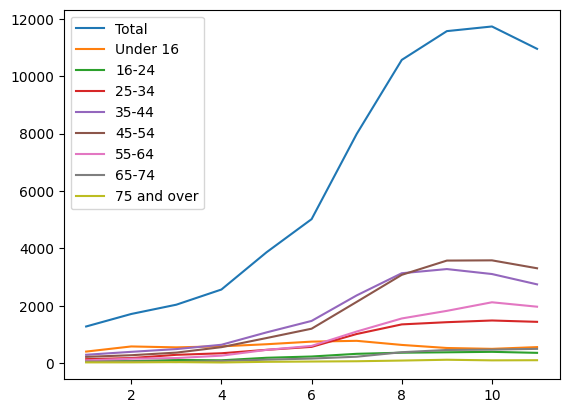

In [ ]:
df_obes.plot()

In [ ]:
# remove kolom Total baru plot
df_obes_ag = df_obes.drop(columns=["Total"])
df_obes_ag

,Year,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [ ]:
# jadikan kolom Year sebagai index
# index akan menjadi label x-axis di plot nanti
df_obes_ag = df_obes_ag.set_index("Year")
df_obes_ag

,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,
2002/03,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<Axes: xlabel='Year'>

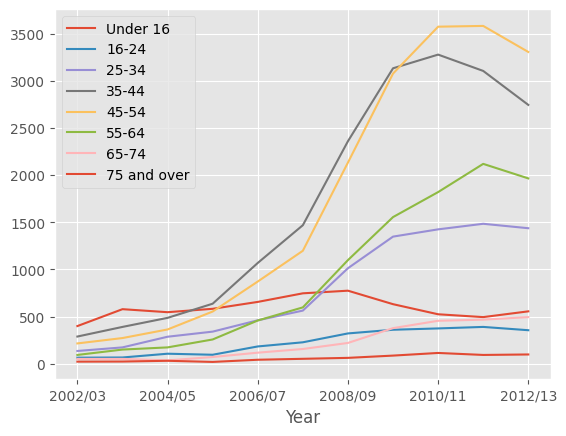

In [ ]:
df_obes_ag.plot()

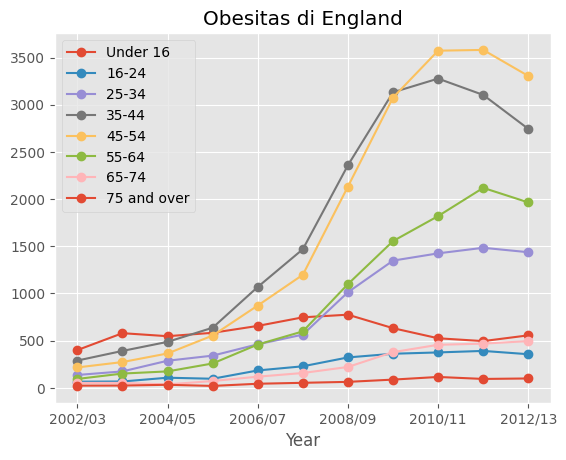

In [ ]:
# percantik
mpl.style.use('ggplot')

df_obes_ag.plot(marker="o")

plt.title("Obesitas di England")
plt.show()

braket umur 35-44 yang paling banyak bertambah jumlah obesitas nya

braket umur 25-34 dan 55-64 kedua terbanyak meningkat jumlah obesitasnya

yang lain, yang berumur dibawah 24 dan diatas 65 tidak banyak berubah

kita bisa berikan konklusi: TIDAK, anak anak tidak bertambah banyak jumlah obesitasnya. justru orang dewasa yang bertambah banyak obesitasnya.

# Time Series
tipe data yang ada tanggal atau waktu nya

1. coba buat data time series sendiri
  - pembuatan data dummy berguna untuk latihan dan testing
2. set index menjadi data tanggalan nya
  - pakai set_index
  - pakai reset_index
3. ubah tipe data lain (biasanya object, text) menjadi tanggalan
  - pd.to_datetime()
  - datetime.strptime()
  bisa ubah format string tertentu menjadi tanggal, misalnya 01-December-2023
  - datetime.strftime()
4. mengambil bagian dari datetime, misal tahun, bulan, hari
  - .day
  - .weekday
  - .year
  - .month
  - .hour
  - dan lainnya
5. resample
6. rolling sum
  - biasa
  - backfill

Terakhir kita ada case study dengan data riil tipe Time Series


In [ ]:
# masih menggunakan pandas, kita generate dummy data
# misalkan kita bikin data tentang jumlah viewers website kita dari hari ke hari
tanggalan = pd.date_range(start="2023-01-01", end='2023-12-31', freq='D')
tanggalan

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [ ]:
size = len(tanggalan)
size

365

In [ ]:
visitors = np.round(np.random.random(365) * 900 + 100)
visitors

array([ 326.,  693.,  611.,  203.,  864.,  707.,  500.,  615.,  958.,
        706.,  225.,  442.,  390.,  160.,  273.,  382.,  287.,  619.,
        489.,  550.,  798.,  880.,  534.,  524.,  806.,  881.,  214.,
        831.,  569.,  759.,  189.,  564.,  775.,  105.,  712.,  116.,
        730.,  872.,  132.,  885.,  156.,  239.,  611.,  572.,  350.,
        157.,  127.,  416.,  433.,  652.,  627.,  130.,  624.,  246.,
        773.,  902.,  393.,  604.,  700.,  668.,  208.,  540.,  990.,
        364.,  279.,  668.,  477.,  468.,  872.,  469.,  774.,  110.,
        492.,  471.,  694.,  406.,  963.,  267.,  781.,  267.,  940.,
        511.,  143.,  303.,  320.,  191.,  574.,  438.,  509.,  167.,
        998.,  903.,  195.,  228.,  529.,  552.,  877.,  212.,  784.,
        781.,  493.,  180.,  649.,  786.,  362.,  457.,  887.,  412.,
        563.,  781.,  146.,  524.,  651.,  987.,  883.,  984.,  441.,
        543.,  974.,  205.,  654.,  241.,  451.,  171.,  928.,  843.,
        408.,  230.,

In [ ]:
df_visitors = pd.DataFrame({"Date": tanggalan, "Visitors":visitors})
df_visitors

,Date,Visitors
0,2023-01-01,326.0
1,2023-01-02,693.0
2,2023-01-03,611.0
3,2023-01-04,203.0
4,2023-01-05,864.0
...,...,...
360,2023-12-27,1000.0
361,2023-12-28,437.0
362,2023-12-29,480.0
363,2023-12-30,950.0


index kita cuma angka urut

lebih berguna kalau kita set menjadi tanggal nya

jadi kalau mau ambil data tanggal tertentu, bisa pakai index langsung. gk perlu pakai query per kolom Date. selain itu kalau kita plot dia juga otomatis jadi x-axis labels.

In [ ]:
df_visitors = df_visitors.set_index("Date")
df_visitors.head()

,Visitors
Date,
2023-01-01,326.0
2023-01-02,693.0
2023-01-03,611.0
2023-01-04,203.0
2023-01-05,864.0


<Axes: xlabel='Date'>

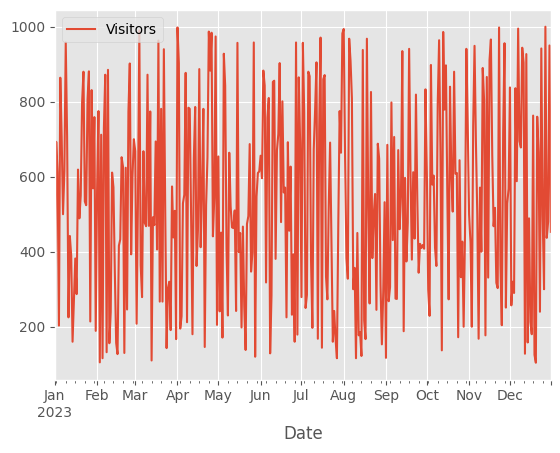

In [ ]:
df_visitors.plot()

In [ ]:
# misalnya gk jadi, index nya mau balik ke awal
# kita bisa pakai reset_index

df_visitors.reset_index()

,Date,Visitors
0,2023-01-01,326.0
1,2023-01-02,693.0
2,2023-01-03,611.0
3,2023-01-04,203.0
4,2023-01-05,864.0
...,...,...
360,2023-12-27,1000.0
361,2023-12-28,437.0
362,2023-12-29,480.0
363,2023-12-30,950.0


In [ ]:
text_tanggal = ["01-December-2023", "03-June-2024", "08-October-2025"]
pd.to_datetime(text_tanggal)

DatetimeIndex(['2023-12-01', '2024-06-03', '2025-10-08'], dtype='datetime64[ns]', freq=None)

strptime == text > tanggal

strftime == tanggal > text

In [ ]:
# datetime.strptime() juga bisa ubah text jadi tanggal
format_data_kita = '%d-%B-%Y'

for tgl in text_tanggal:
  tanggal_baru = datetime.strptime(tgl, '%d-%B-%Y')
  print(tanggal_baru)

  # strftime() ubah tanggal jadi text
  text_baru = datetime.strftime(tanggal_baru, "%A, %d %b'%y")
  print(text_baru)
  print()


2023-12-01 00:00:00
Friday, 01 Dec'23

2024-06-03 00:00:00
Monday, 03 Jun'24

2025-10-08 00:00:00
Wednesday, 08 Oct'25



## mengambil bagian dari datetime
- .day
.weekday
.year
.month
.hour
dan lainnya

- resample
- rolling sum

In [ ]:
df_visitors

,Visitors
Date,
2023-01-01,326.0
2023-01-02,693.0
2023-01-03,611.0
2023-01-04,203.0
2023-01-05,864.0
...,...
2023-12-27,1000.0
2023-12-28,437.0
2023-12-29,480.0


In [ ]:
# tanggal kita ada di index, jadi kita minta .index dulu
# baru .day
df_visitors.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=365)

In [ ]:
# kita bisa masukin ke kolom baru
df_visitors['tgl'] = df_visitors.index.day
df_visitors['bln'] = df_visitors.index.month
df_visitors['thn'] = df_visitors.index.year
df_visitors['hari'] = df_visitors.index.weekday
df_visitors.head()

,Visitors,tgl,bln,thn,hari
Date,,,,,
2023-01-01,326.0,1,1,2023,6
2023-01-02,693.0,2,1,2023,0
2023-01-03,611.0,3,1,2023,1
2023-01-04,203.0,4,1,2023,2
2023-01-05,864.0,5,1,2023,3


In [ ]:
df_visitors['jam'] = df_visitors.index.hour
df_visitors.head()

,Visitors,tgl,bln,thn,hari,jam
Date,,,,,,
2023-01-01,326.0,1,1,2023,6,0
2023-01-02,693.0,2,1,2023,0,0
2023-01-03,611.0,3,1,2023,1,0
2023-01-04,203.0,4,1,2023,2,0
2023-01-05,864.0,5,1,2023,3,0


In [ ]:
# julian date, kita minta tanggalan dari datetime, di convert ke timetuple(), baru diambil tm_yday
print(tanggal_baru)
print("julan date:", tanggal_baru.timetuple().tm_yday)

281

In [ ]:
# resample
df_vis2 = df_visitors.reset_index()[["Date", "Visitors"]]
df_vis2.head()

,Date,Visitors
0,2023-01-01,326.0
1,2023-01-02,693.0
2,2023-01-03,611.0
3,2023-01-04,203.0
4,2023-01-05,864.0


<Axes: xlabel='Date', ylabel='Visitors'>

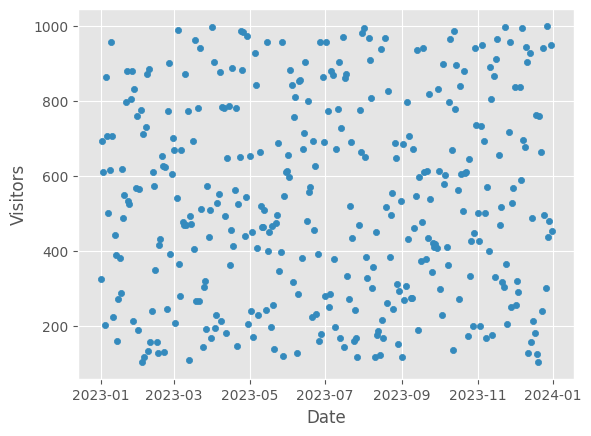

In [ ]:
df_vis2.plot(kind="scatter", x="Date", y="Visitors")

terkadang data yang tidak terlihat pattern nya per unit tanggal kecil seperti harian diatas, mungkin ada pattern nya kalau kita gabungin jadi per week, atau per month, atau per year?

kita gunakan resample untuk menggabungkan

catatan: saat resample, kita menggabungkan beberapa data jadi satu. jadi kita perlu juga kasih tau agregasinya gmn, mau di jumlah, di rata2, min, max, atau lainnya.

contoh, data diatas untuk setiap 7 hari akan kita gabung jadi 1 data weekly

In [ ]:
df_vis3 = df_vis2.set_index("Date")
df_vis3.head()

,Visitors
Date,
2023-01-01,326.0
2023-01-02,693.0
2023-01-03,611.0
2023-01-04,203.0
2023-01-05,864.0


In [ ]:
# total visitors kita per minggu berapa?
df_vis3_weekly = df_vis3.resample('W').sum()
df_vis3_weekly.head()

,Visitors
Date,
2023-01-01,326.0
2023-01-08,4193.0
2023-01-15,3154.0
2023-01-22,4005.0
2023-01-29,4359.0


<Axes: xlabel='Date'>

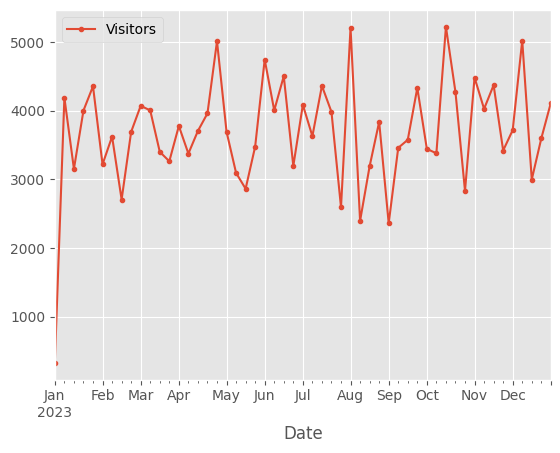

In [ ]:
df_vis3_weekly.plot(marker=".")

In [ ]:
# per bulan resampling
df_vis3_monthly = df_vis3.resample('M').sum()
df_vis3_monthly.head()

,Visitors
Date,
2023-01-31,16985.0
2023-02-28,13603.0
2023-03-31,15324.0
2023-04-30,17967.0
2023-05-31,14905.0


<Axes: xlabel='Date'>

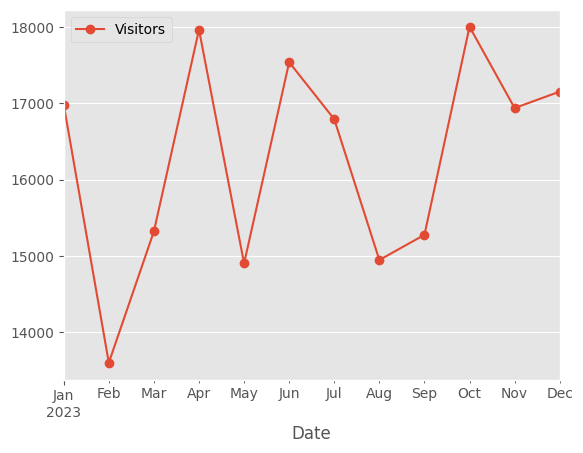

In [ ]:
df_vis3_monthly.plot(marker="o")

demikian untuk resampling

terakhir kita mau bahas rolling sum. rolling sum adalah total selama x waktu, dihitung mundur. jadi datanya tetap harian. data awal kita harian, data akhir nanti harian juga. dia ambilnya kalau weekly berarti total 7 hari terakhir.

In [ ]:
# rolling sum
df_vis3.head()

,Visitors
Date,
2023-01-01,326.0
2023-01-02,693.0
2023-01-03,611.0
2023-01-04,203.0
2023-01-05,864.0


In [ ]:
df_vis3["rolling_sum_7"] = df_vis3.rolling(7).sum()
df_vis3.head(10)

,Visitors,rolling_sum_7
Date,,
2023-01-01,326.0,NaN
2023-01-02,693.0,NaN
2023-01-03,611.0,NaN
2023-01-04,203.0,NaN
2023-01-05,864.0,NaN
2023-01-06,707.0,NaN
2023-01-07,500.0,3904.0
2023-01-08,615.0,4193.0
2023-01-09,958.0,4458.0


In [ ]:
df_vis3 = df_vis2.set_index("Date") # reset data df_vis3

df_vis3["rolling_sum_7"] = df_vis3.rolling(7).sum().fillna(method='backfill')
df_vis3.head(10)

,Visitors,rolling_sum_7
Date,,
2023-01-01,326.0,3904.0
2023-01-02,693.0,3904.0
2023-01-03,611.0,3904.0
2023-01-04,203.0,3904.0
2023-01-05,864.0,3904.0
2023-01-06,707.0,3904.0
2023-01-07,500.0,3904.0
2023-01-08,615.0,4193.0
2023-01-09,958.0,4458.0


In [ ]:
# Case Study penggunaan energi di German boleh dicoba
# fokus ke tipe data datetime, tarik keluar info tanggalan seperti tahun bulan minggu hari, dan resampling